# Assignment #5 - Deep Learning

### <font color="red"> DUE: Apr 19 (Thursday) 11:00 pm </font>  

<font color="blue"> Rajendra Jadi <br> 801023390 </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# Objective

The objective of the assigment is to understand and implement the Deep learning methods. The goal of this assignment is to test different types of neural networks and observe the different errors they produce. The different neural networks being used in the assignment are perceptron, feed-forward and deep feed forward. 

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

#  description of data

The Automobile data set contains 8 attributes. I chose this data set due to its larger feature set than my previous data sets. It assesses heating and cooling load requirements of automobile from different  parameters. From the other features we can apply regression to predict the last two features, heating and cooling. All features are numerical.

Most features were positively correlated with average heating/cooling. The notable exceptions to this were roof area and surface area which both showed an initial positive correlation followed by a negative correlation. However none of these trends were very dynamic and the spread of the heating/cooling values may make it more difficult to accurately predict.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
import IPython.display as ipd  # for display and clear_output
from IPython.display import display
import itertools
%matplotlib inline
import tensorflow as tf

df = pd.read_csv("automobile.csv")
df.head()


,wheel-base,length,width,height,curb-weight,bore,stroke,compression,horsepower,peak-rpm
0,0.98,514.5,294.0,110.25,7.0,2,0.1,3,24.28,25.68
1,0.98,514.5,294.0,110.25,7.0,3,0.1,3,24.40,26.02
2,0.98,514.5,294.0,110.25,7.0,4,0.1,3,24.11,25.84
3,0.98,514.5,294.0,110.25,7.0,5,0.1,3,24.35,26.14
4,0.90,563.5,318.5,122.50,7.0,2,0.1,3,28.07,34.14


# Plots to visualize data

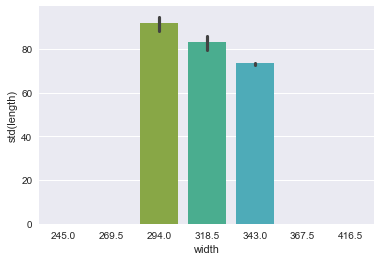

In [2]:
sns.barplot(x='width',y='length',data=df,estimator=np.std)

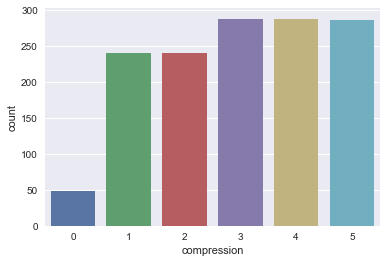

In [3]:
sns.countplot(x='compression',data=df)

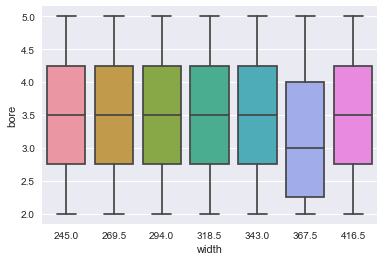

In [4]:
sns.boxplot(x='width',y='bore',data=df)

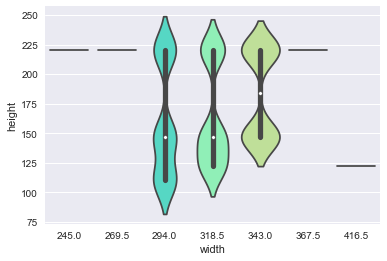

In [43]:
sns.violinplot(x="width", y="height", data=df,palette='rainbow')

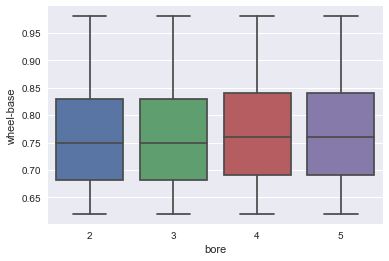

In [5]:
sns.boxplot(x='bore',y='wheel-base',data=df)

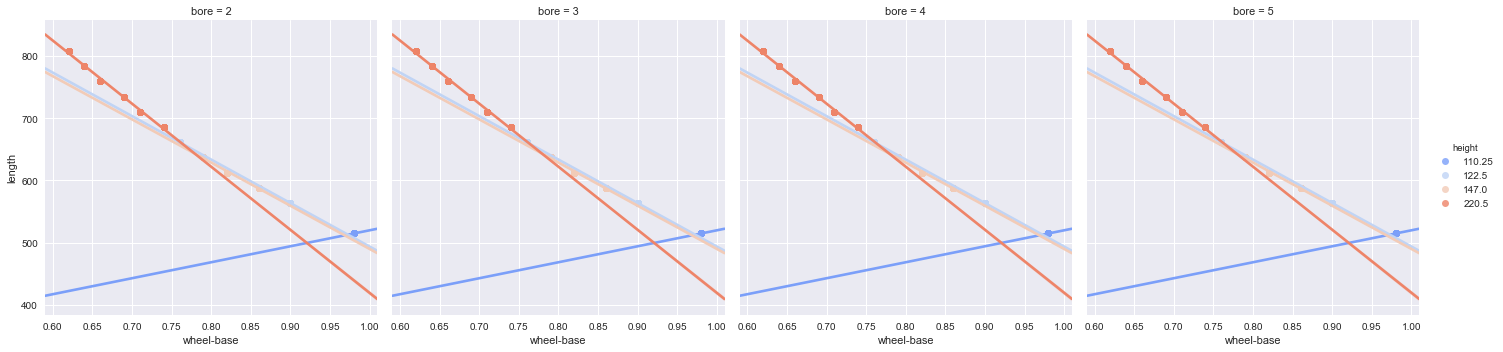

In [6]:
sns.lmplot(x='wheel-base',y='length',col='bore',hue='height',data=df,palette='coolwarm')

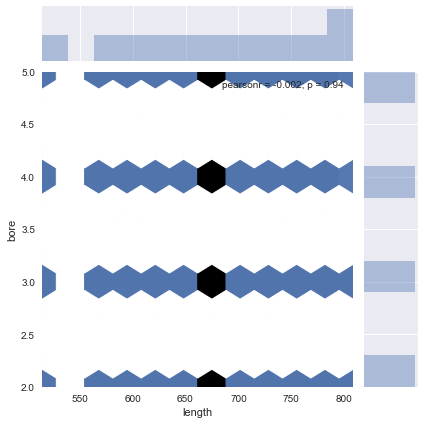

In [35]:
sns.jointplot(x='length',y='bore',data=df,kind='hex')

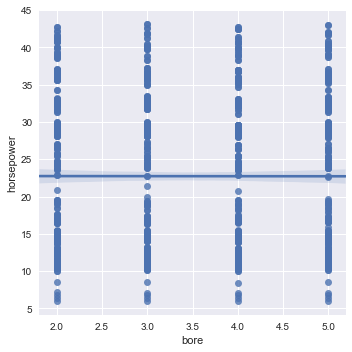

In [36]:
sns.lmplot(x='bore',y='horsepower',data=df)

## Reading and analyzing the plots

Above plots show, the co-releation between various parameter like length, bore, compression-ratio, heigth.
Lets apply the deepl learning methods and build neural network with atleast 3 different netowrks for experiments and divid the data into training and testing respectively and predict the output vaialbes using deep network methods.

# III. Methods

In this assignment, you are build a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

![](https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)



# Explanation of the choice for 3 different neural network structures and reason for the selection.

In this assignment I have implemented the 
#### perceptron  <br> feed forward <br> deep feed forward networks




The summarized steps are as follows:
<br> Reading the training data (inputs and outputs)
<br> Building and connect the neural networks layers 
<br> After that, lets build a loss function to assess the prediction error
<br> Create a training loop in order to  train the network and update its parameters
<br> Applying some testing data to assess the network prediction accuracy

Perceptron: A perceptron neural network works by taking in input and directly influencing the input. This model has no hidden layers so once the input has been affected by the error calculations it is output. I will have 16 inputs, matching my data, and one output.

Feed Forward: Feed-Forward neural network works by including a hidden layer. Instead of the input directly being influenced and then output a Feed-Forward network has a hidden layer where inputs and affected by learned weights. I will have 16 inputs, matching my data, 10 hidden units in the hidden layer and one output.
<br>Deep Feed Forward: A deep neural network works very similarly to the feed-forward network. The main different between the two is that a deep network has many hidden layers. I will have 16 inputs, matching my data, 12 hidden units in each hidden layer and one output.
<br> We build dense neural network structures using tensorflow's layers module. The function will build a perception model by default and add additional layers if specified with the provided number of hidden units. From here I can simply pass in my data and the desired structure and it will train and test that structure of neural network against my data. I am performing predictive regression on my data to determine the final two features from the others.

**Perceptron:** A perceptron neural network works by taking in input and directly influencing the input. This model has no hidden layers so once the input has been affected by the error calculations it is output. I will have 16 inputs, matching my data, and one output.

# Explaination of Codes
Below is the implementation Perceptron. I have used tensorflow for the implementation. The cost function of the network is used to generate a measure of deviation between the network’s predictions and the actual observed training targets. For regression problems, the mean squared error (MSE) function is commonly used. MSE computes the average squared deviation between predictions and targets. mse = tf.reduce_mean(tf.square(error), name="mse")

In [8]:
def PP(Xdata,Tdata,hLayers=[],alpha=0.1):
    # Hidden layers used to build NN
    reset_graph()
    ni = Xdata.shape[1]
    no = Tdata.shape[1]

    # inputs for training
    X = tf.placeholder(tf.float32, [None, ni], name="X")
    T = tf.placeholder(tf.float32, [None, no], name="T")

    # building NN
    with tf.name_scope("nn"):
        Z = X
        i = 1
        for nh in hLayers:
            Z = tf.layers.dense(Z, nh, activation=tf.tanh, name="h"+str(i))
            i += 1
        Y = tf.layers.dense(Z, no, name="out")
    with tf.name_scope("loss"):
        error = T - Y
        mse = tf.reduce_mean(tf.square(error), name="mse")
    with tf.name_scope("train"):
        optimizer = tf.train.AdamOptimizer(learning_rate=alpha)
        training_op = optimizer.minimize(mse)

    n_epochs = 1000
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        init.run()
        errorTrace = []
        for epoch in range(n_epochs):

            err, _ = sess.run([mse, training_op], {X: Xdata, T: Tdata})
            errorTrace.append(err)
        print("Train MSE: ", mse.eval({X: Xdata, T: Tdata}))
        print("Test MSE: ", mse.eval({X: Xdata, T: Tdata}))

 ** Feed-Forward ** neural network works by including a hidden layer. Instead of the input directly being influenced and then output a Feed-Forward network has a hidden layer where inputs and affected by learned weights. I will have 16 inputs, matching my data, 10 hidden units in the hidden layer and one output.

# Explaination of Codes
Below is the implemetation of Feed forward netowrk. The optimizer takes care of the necessary computations that are used to adapt the network’s weight and bias variables during training. Those computations invoke the calculation of so called gradients, that indicate the direction in which the weights and biases have to be changed during training in order to minimize the network’s cost function. optimizer = tf.train.AdamOptimizer(learning_rate=alpha)

In [10]:


def FF(Xdata,Tdata,hLayers=[],alpha=0.1):
    # Hidden layers used to build NN
    reset_graph()
    ni = Xdata.shape[1]
    no = Tdata.shape[1]

    # inputs for training
    X = tf.placeholder(tf.float32, [None, ni], name="X")
    T = tf.placeholder(tf.float32, [None, no], name="T")

    # building NN
    with tf.name_scope("nn"):
        Z = X
        i = 1
        for nh in hLayers:
            Z = tf.layers.dense(Z, nh, activation=tf.tanh, name="h"+str(i))
            i += 1
        Y = tf.layers.dense(Z, no, name="out")
    with tf.name_scope("loss"):
        error = T - Y
        mse = tf.reduce_mean(tf.square(error), name="mse")
    with tf.name_scope("train"):
        optimizer = tf.train.AdamOptimizer(learning_rate=alpha)
        training_op = optimizer.minimize(mse)

    n_epochs = 10
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        init.run()
        errorTrace = []
        for epoch in range(n_epochs):

            err, _ = sess.run([mse, training_op], {X: Xdata, T: Tdata})
            errorTrace.append(err)
        print("Train MSE: ", mse.eval({X: Xdata, T: Tdata}))
        print("Test MSE: ", mse.eval({X: Xdata, T: Tdata}))
        plt.plot(errorTrace)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.show()
        plt.plot(Tdata[:,0], '.',color='c',label="T_CoolLoad")
        plt.plot(Tdata[:,1], '.',color='y',label="T_HeatLoad")
        plt.plot(Y.eval({X: Xdata})[:,0], '.',color='g',label="Y_CoolLoad")
        plt.plot(Y.eval({X: Xdata})[:,1], '.',color='c',label="Y_HeatLoad")
        plt.xlabel('Index')
        plt.ylabel('Load')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

# Explanation of codes for each structure
Below is the implementation to visualize the graph and reset teh graph. This fuction to visulize is being used in successive methods to visualize the data using the DL model.

In [11]:
from IPython.display import clear_output, Image, display, HTML

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

    
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

**Deep Feed Forward**: A deep neural network works very similarly to the feed-forward network. The main different between the two is that a deep network has many hidden layers. I will have 16 inputs, matching my data, 12 hidden units in each hidden layer and one output.

# Explanation of experimental codes
In a first step,  We create a network with  hidden layers with ReLU activations, and an output layer with softmax. We use dropout for regularization.
<br> The output is a softmax output, and we train it with the cross entropy loss. We further define functions which calculate the predicted label, and the accuracy of the network.

Cost function
The cost function of the network is used to generate a measure of deviation between the network’s predictions and the actual observed training targets. For regression problems, the mean squared error (MSE) function is commonly used. MSE computes the average squared deviation between predictions and targets.
mse = tf.reduce_mean(tf.square(error), name="mse")

Optimizer
The optimizer takes care of the necessary computations that are used to adapt the network’s weight and bias variables during training. Those computations invoke the calculation of so called gradients, that indicate the direction in which the weights and biases have to be changed during training in order to minimize the network’s cost function. 
optimizer = tf.train.AdamOptimizer(learning_rate=alpha)

In [46]:
def DFF(Xdata,Tdata,hLayers=[],alpha=0.1):
    # Hidden layers used to build NN
    reset_graph()
    ni = Xdata.shape[1]
    no = Tdata.shape[1]

    # inputs for training
    X = tf.placeholder(tf.float32, [None, ni], name="X")
    T = tf.placeholder(tf.float32, [None, no], name="T")

    # building NN
    with tf.name_scope("nn"):
        Z = X
        i = 1
        for nh in hLayers:
            Z = tf.layers.dense(Z, nh, activation=tf.tanh, name="h"+str(i))
            i += 1
        Y = tf.layers.dense(Z, no, name="out")
    with tf.name_scope("loss"):
        error = T - Y
        mse = tf.reduce_mean(tf.square(error), name="mse")
    with tf.name_scope("train"):
        optimizer = tf.train.AdamOptimizer(learning_rate=alpha)
        training_op = optimizer.minimize(mse)

    n_epochs = 1000
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        init.run()
        errorTrace = []
        for epoch in range(n_epochs):

            err, _ = sess.run([mse, training_op], {X: Xdata, T: Tdata})
            errorTrace.append(err)
        print("Train MSE: ", mse.eval({X: Xdata, T: Tdata}))
        print("Test MSE: ", mse.eval({X: Xdata, T: Tdata}))
        sns.pointplot(x='height',y='length',data=df)
        
        plt.plot(errorTrace)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.show()
        plt.plot(Tdata[:,0], '.',color='c',label="T_CoolLoad")
        plt.plot(Tdata[:,1], '.',color='y',label="T_HeatLoad")
        plt.plot(Y.eval({X: Xdata})[:,0], '.',color='g',label="Y_CoolLoad")
        plt.plot(Y.eval({X: Xdata})[:,1], '.',color='c',label="Y_HeatLoad")
        plt.xlabel('Index')
        plt.ylabel('Load')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
        plt.show()


Initializers
Initializers are used to initialize the network’s variables before training. Since neural networks are trained using numerical optimization techniques, the starting point of the optimization problem is one the key factors to find good solutions to the underlying problem. There are different initializers available in TensorFlow, each with different initialization approaches. Here, I use the tf.variance_scaling_initializer()
tf.global_variables_initializer()

# explanation of the codes

In [13]:
df = df.sort_values( ["horsepower","peak-rpm"])
InputFeatures = ["wheel-base","length","width","height","curb-weight","bore","stroke","compression"]
OutputFeatures = ["horsepower","peak-rpm"]


# 	explanation of the codes
 ** train**: the "train" method implements  algorithm to train model
<br> **test **: this method executes the model.
<br>The data is divided between the train and test and Perceptron, Feed Forward and Deep Feed Forward methods are applied.

In [14]:
X_train = np.concatenate((np.array(df.iloc[0:40, 1:]), np.array(df.iloc[80:120, 1:])))
X_train = X_train.astype(float)
Xtest = np.concatenate((np.array(df.iloc[40:80, 1:]), np.array(df.iloc[120:160, 1:])))
Xtest = Xtest.astype(float)

T = df.iloc[:160, 0]

T = pd.DataFrame(T)
Ttrain = np.concatenate((np.array(T.iloc[0:40, 0]), np.array(T.iloc[80:120, 0])))
Ttrain = Ttrain.astype(float)
Ttrain = Ttrain.reshape(len(Ttrain), 1)
Ttest = np.concatenate((np.array(T.iloc[40:80, 0]), np.array(T.iloc[120:160, 0])))
Ttest = Ttest.astype(float)
Ttest = Ttest.reshape(len(Ttest), 1)

# IV - Results

- Presents the results of applications of your deep networks.
- Visualize the results 
- Discuss about the choice of network structures and performance of it as you change the structures.  
- What do you think about the results? 

As stated above: I chose to implement the perceptron, feed forward and deep feed forward networks for my experiments. I chose these because they are simple, I was most familiar with their concept and implementation, and in the last assignment my tests indicated that the perception model can be very effective.

After trying all three, the feedforward and deep feedforward performed much worse than the perception model. I believe this may be due to overfitting, and that despite choosing a data set that was more complex than my previous sets, these structures may work better on even larger data sets. I also didn’t implement many of the options to aid in the prevention of overfitting, so this may be a factor as well. Nevertheless, the perception model did an adequate job of accurately predicting output based on its learned weights.

# plots for results

# 	explanation of the codes

After having defined the placeholders, variables, initializers, cost functions and optimizers of the network, the model needs to be trained. 
A sampled data batch of X flows through the network until it reaches the output layer. There, TensorFlow compares the models predictions against the actual observed targets Y in the current batch. Afterwards, TensorFlow conducts an optimization step and updates the networks parameters, corresponding to the selected learning scheme. After having updated the weights and biases, the next batch is sampled and the process repeats itself. 

P-Perception
Train MSE:  11.3406
Test MSE:  11.3406


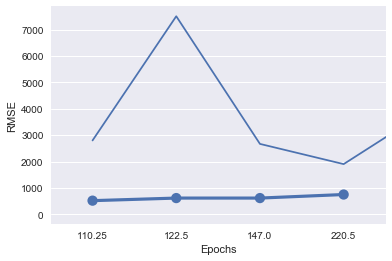

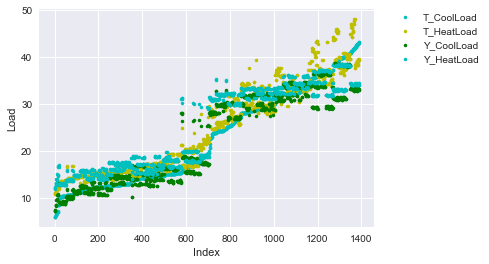

DFF-Deep Feed Forward
Train MSE:  96.5655
Test MSE:  96.5655


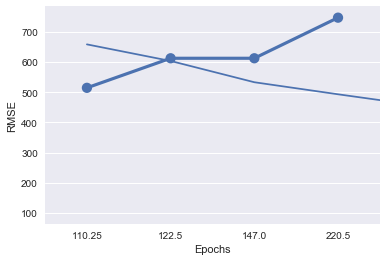

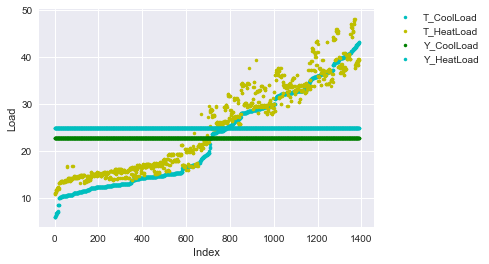

FF-Feed Forward
Train MSE:  96.5655
Test MSE:  96.5655


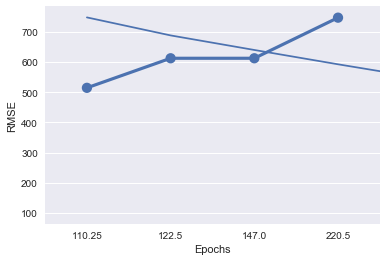

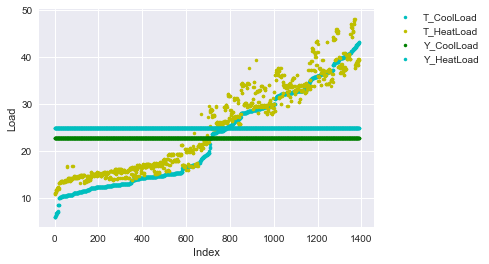

In [49]:
X_train = np.array(df.loc[:,InputFeatures])
Ttrain = np.array(df.loc[:,OutputFeatures])
print("P-Perception")
DFF(X_train,Ttrain)
print("DFF-Deep Feed Forward")
DFF(X_train,Ttrain,[10,10,10,10,10])
print("FF-Feed Forward")
DFF(X_train,Ttrain,[10])



# Discussions about the choice of network structures

I chose perceptron,feed-forward and deep feed forward. From my results the single layer feed-forward produced the smallest test error out of the others with perceptron and DFF closely behind. I believe the deep neural network had larger error because it was overfitting. Hence, the conclusion is because my data does not need that many layers due to its simplicity therefore I believe that the deep neural network is most likely overfitting. Another interesting thing I noticed was with the DFF. I noticed the more hidden units in each layer I added the more overfitting occurred.

## Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

As in the last assignment, the perception model seemed to perform the best. While this may just be because my data is relatively simple, it seems to me that it defeats the purpose of "deep neural networks" in all but very specific circumstances. I think that to better demonstrate the effects of adding additional neurons and layers to a network, it would be beneficial to be given specific data that pairs well with deep neural networks.

# Extra Credit

- Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources. 

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 
